<a href="https://colab.research.google.com/github/toshi47/SOM/blob/main/SOM_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
!pip install mlrose
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
!pip install sompy
!pip install git+https://github.com/compmonks/SOMPY.git
!pip install ipdb==0.8.1
import sompy
from sompy.sompy import SOMFactory
from PIL import Image
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3084 sha256=cadf4c5bbc99bdc02be400c7185ffb0bcd7143f2345c091ddd45020df41dd94c
  Stored in directory: /root/.cache/pip/wheels/e0/93/8c/ff042b6386b17bf7751db3c0ea76db7afb88ded186672f3a3e
Successfully built sompy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/compmonks/SOMPY.git to /tmp/pip-req-build-cfqyimmb
  Running command git clone -q https://github.com/compmonks/SOMPY.git /tmp/pip-req-build-cfqyimmb
  Created wheel for SOMPY: filename=SOMPY-1.0-py3-none-any.whl size=24355 sha256=06517b5408a39a1a2f5131b77386d030885c9398cabc9e033866854faba4b1e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-1d8w6h7n/wheels/95/17/cc/71d201765eff59c98d440

Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [63]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(type(train_X[0]))

<class 'numpy.ndarray'>


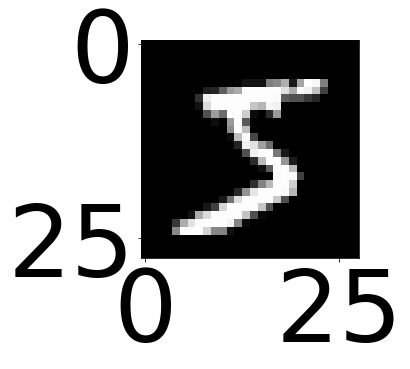

In [65]:
from matplotlib import pyplot
pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [66]:
mapsize = [107,107]
#print(dataset)
print(train_X.shape)
som = sompy.SOMFactory.build(train_X[0], mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

#print(dataset)
#print(np.shape(dataset))


som.train(n_job=1, train_rough_len=5, train_finetune_len=5)  # verbose='debug' will print more, and verbose=None wont print 

topographic_error = som.calculate_topographic_error() ## Quality of the map itself, SOM nodes themselves
quantization_error = np.mean(som._bmu[1]) ## Quality of the affectation of our observations to each node in the SOM map
print('Topographic error = %s; Quantization error = %s' % (topographic_error, quantization_error))

(60000, 28, 28)


 Training...
 pca_linear_initialization took: 0.176000 seconds
 Rough training...
 radius_ini: 14.000000 , radius_final: 3.500000, trainlen: 5

 epoch: 1 ---> elapsed time:  3.994000, quantization error: 2.557868

 epoch: 2 ---> elapsed time:  3.885000, quantization error: 1.116958

 epoch: 3 ---> elapsed time:  3.904000, quantization error: 0.570785

 epoch: 4 ---> elapsed time:  3.851000, quantization error: 0.154586

 epoch: 5 ---> elapsed time:  3.948000, quantization error: 0.005236

 Finetune training...
 radius_ini: 3.500000 , radius_final: 1.000000, trainlen: 5

 epoch: 1 ---> elapsed time:  3.939000, quantization error: 0.000001

 epoch: 2 ---> elapsed time:  3.938000, quantization error: 0.000001

 epoch: 3 ---> elapsed time:  4.147000, quantization error: 0.000001

 epoch: 4 ---> elapsed time:  3.904000, quantization error: 0.000001

/usr/local/lib/python3.7/dist-packages/sompy/sompy.py:432: RuntimeWarning: invalid value encountered in true_divide
  new_codebook = np.divide(

Topographic error = 0.5357142857142857; Quantization error = 1.2734348334173196e-06


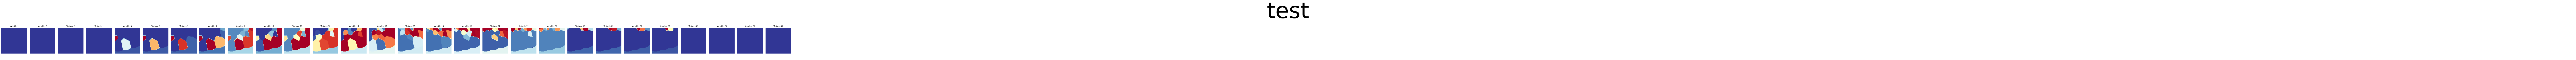

(28,)


array([1, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 0, 0, 1, 1, 1], dtype=int32)

In [56]:
from sompy.visualization.mapview import View2D

v = sompy.mapview.View2DPacked(5, 5, 'test',text_size=8)  
v.show(som, what='codebook',   col_sz=91)
#plt.show()
som.codebook.matrix=np.nan_to_num(som.codebook.matrix)
map_labels = som.cluster(n_clusters=4)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data
print(data_labels.shape)
data_labels






/usr/local/lib/python3.7/dist-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


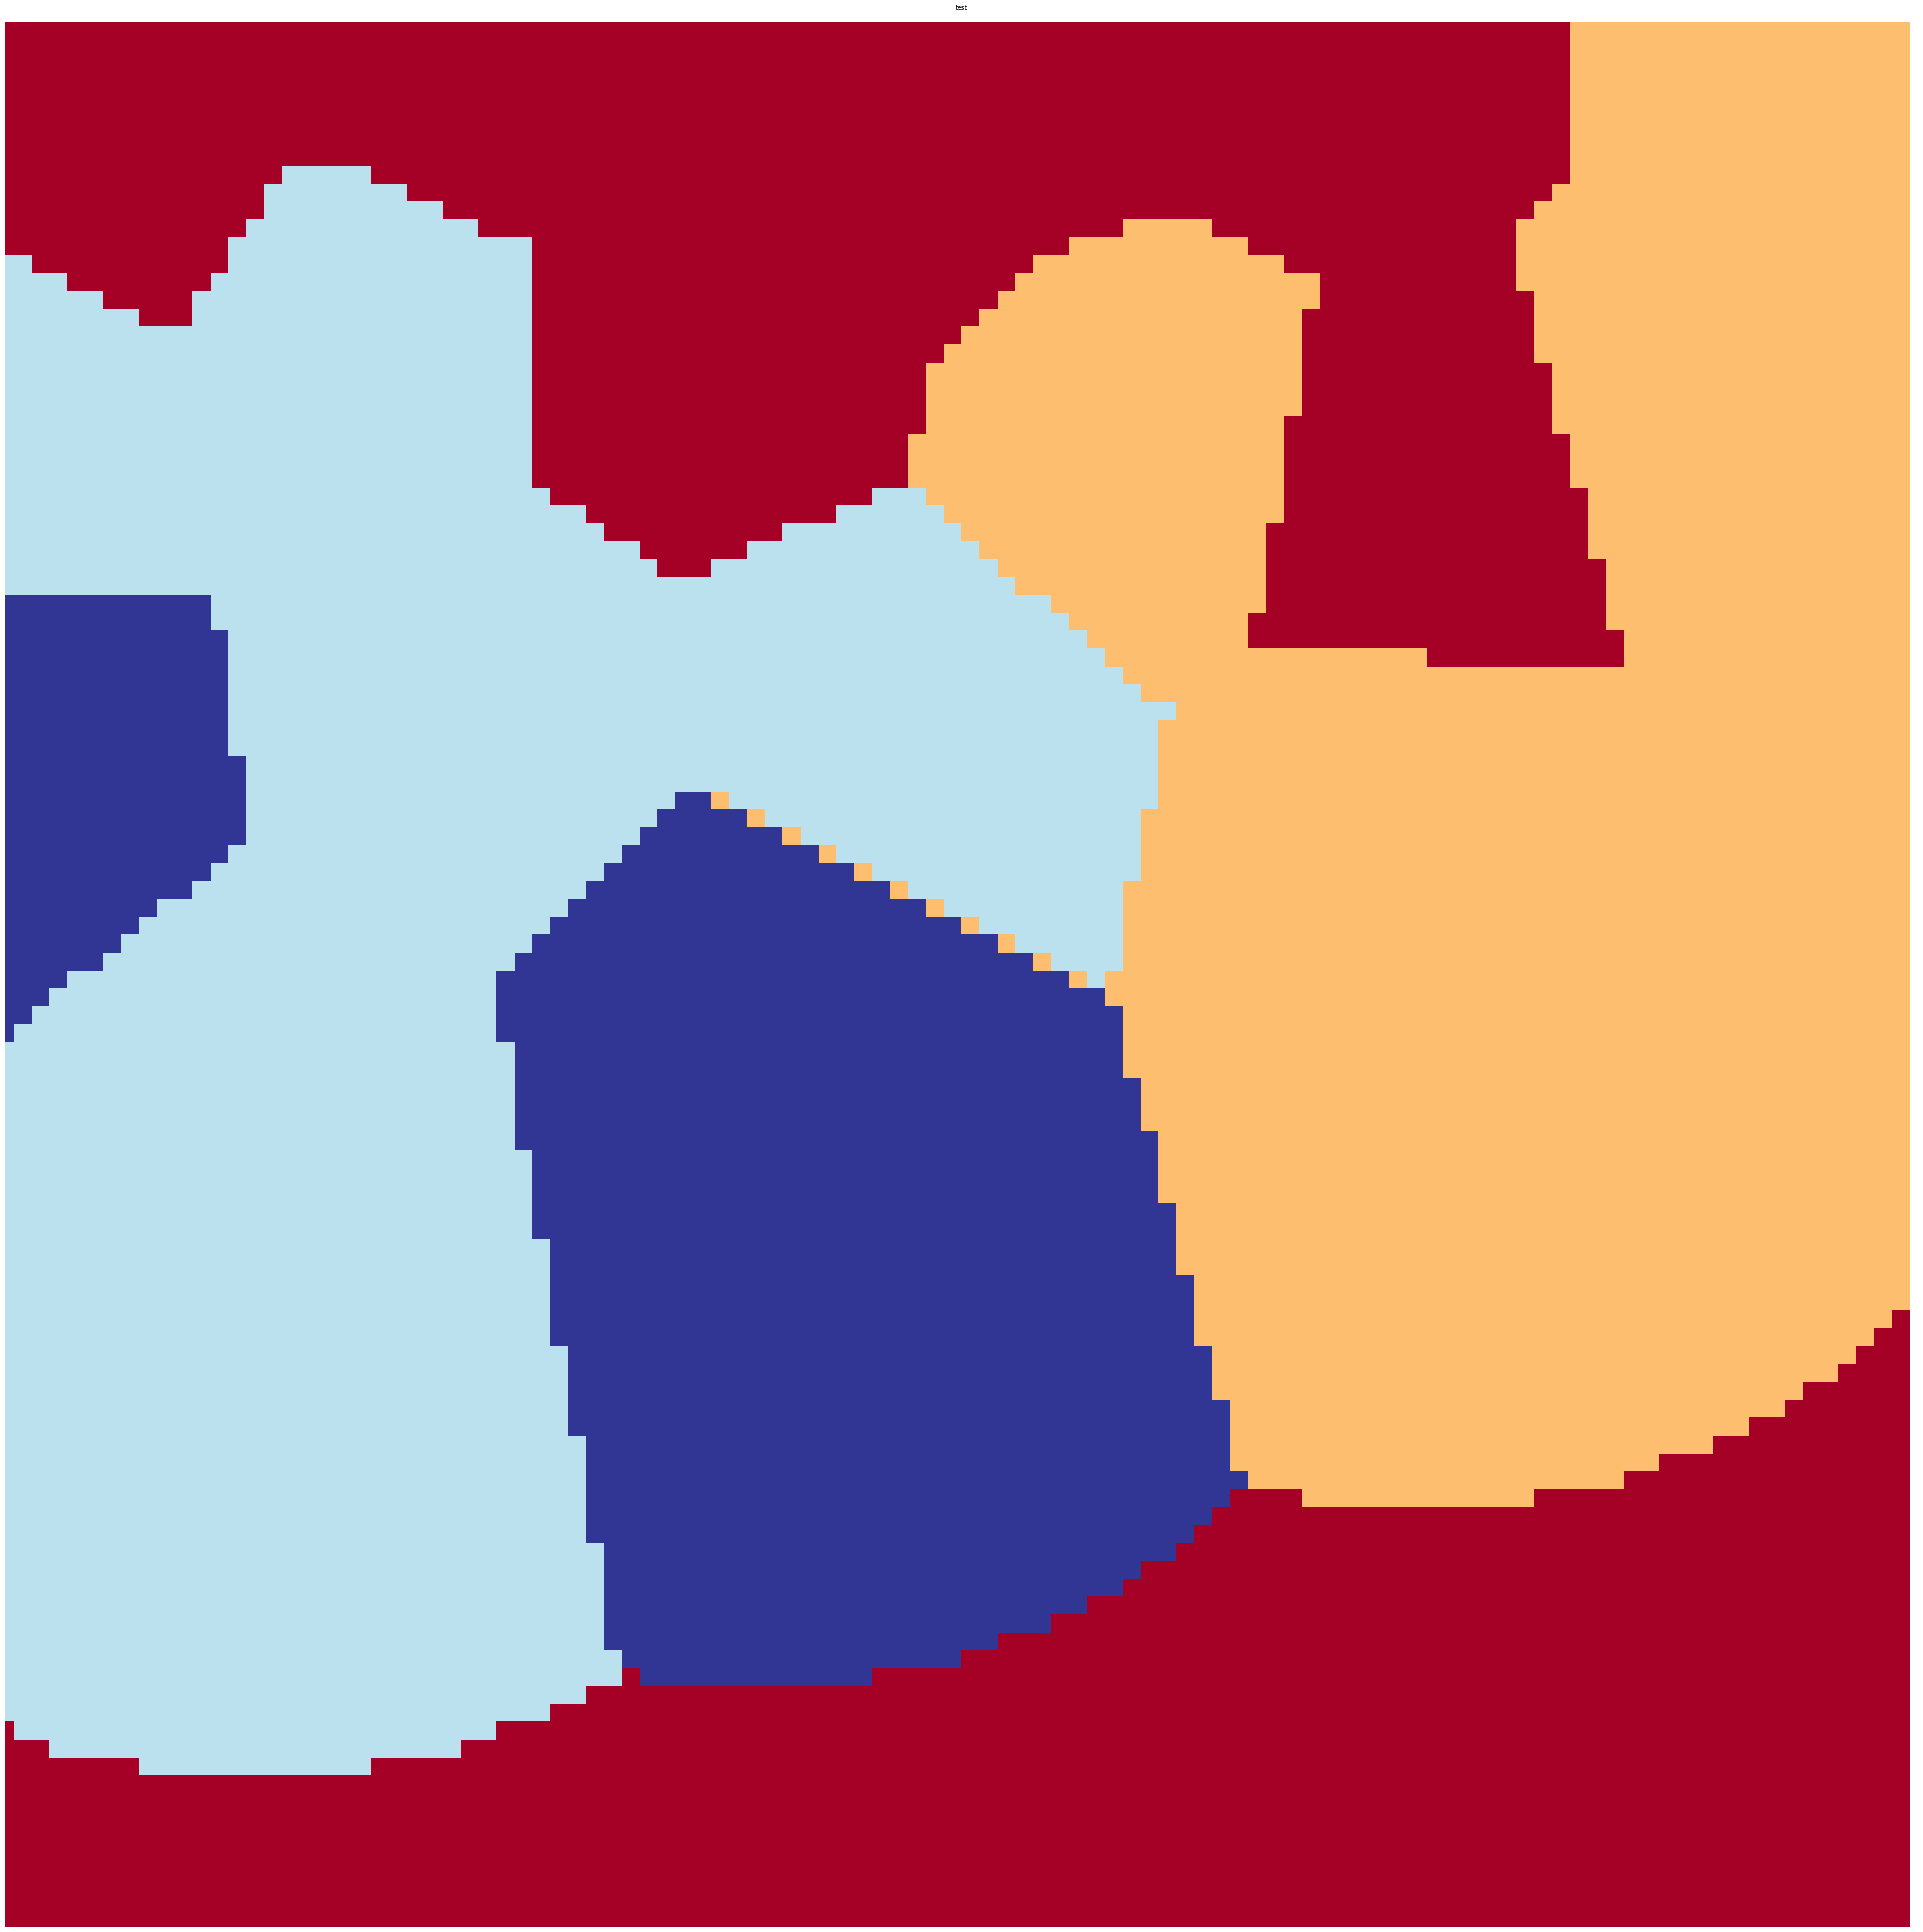

In [57]:
v.show(som, what='cluster')

/usr/local/lib/python3.7/dist-packages/sompy/visualization/hitmap.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


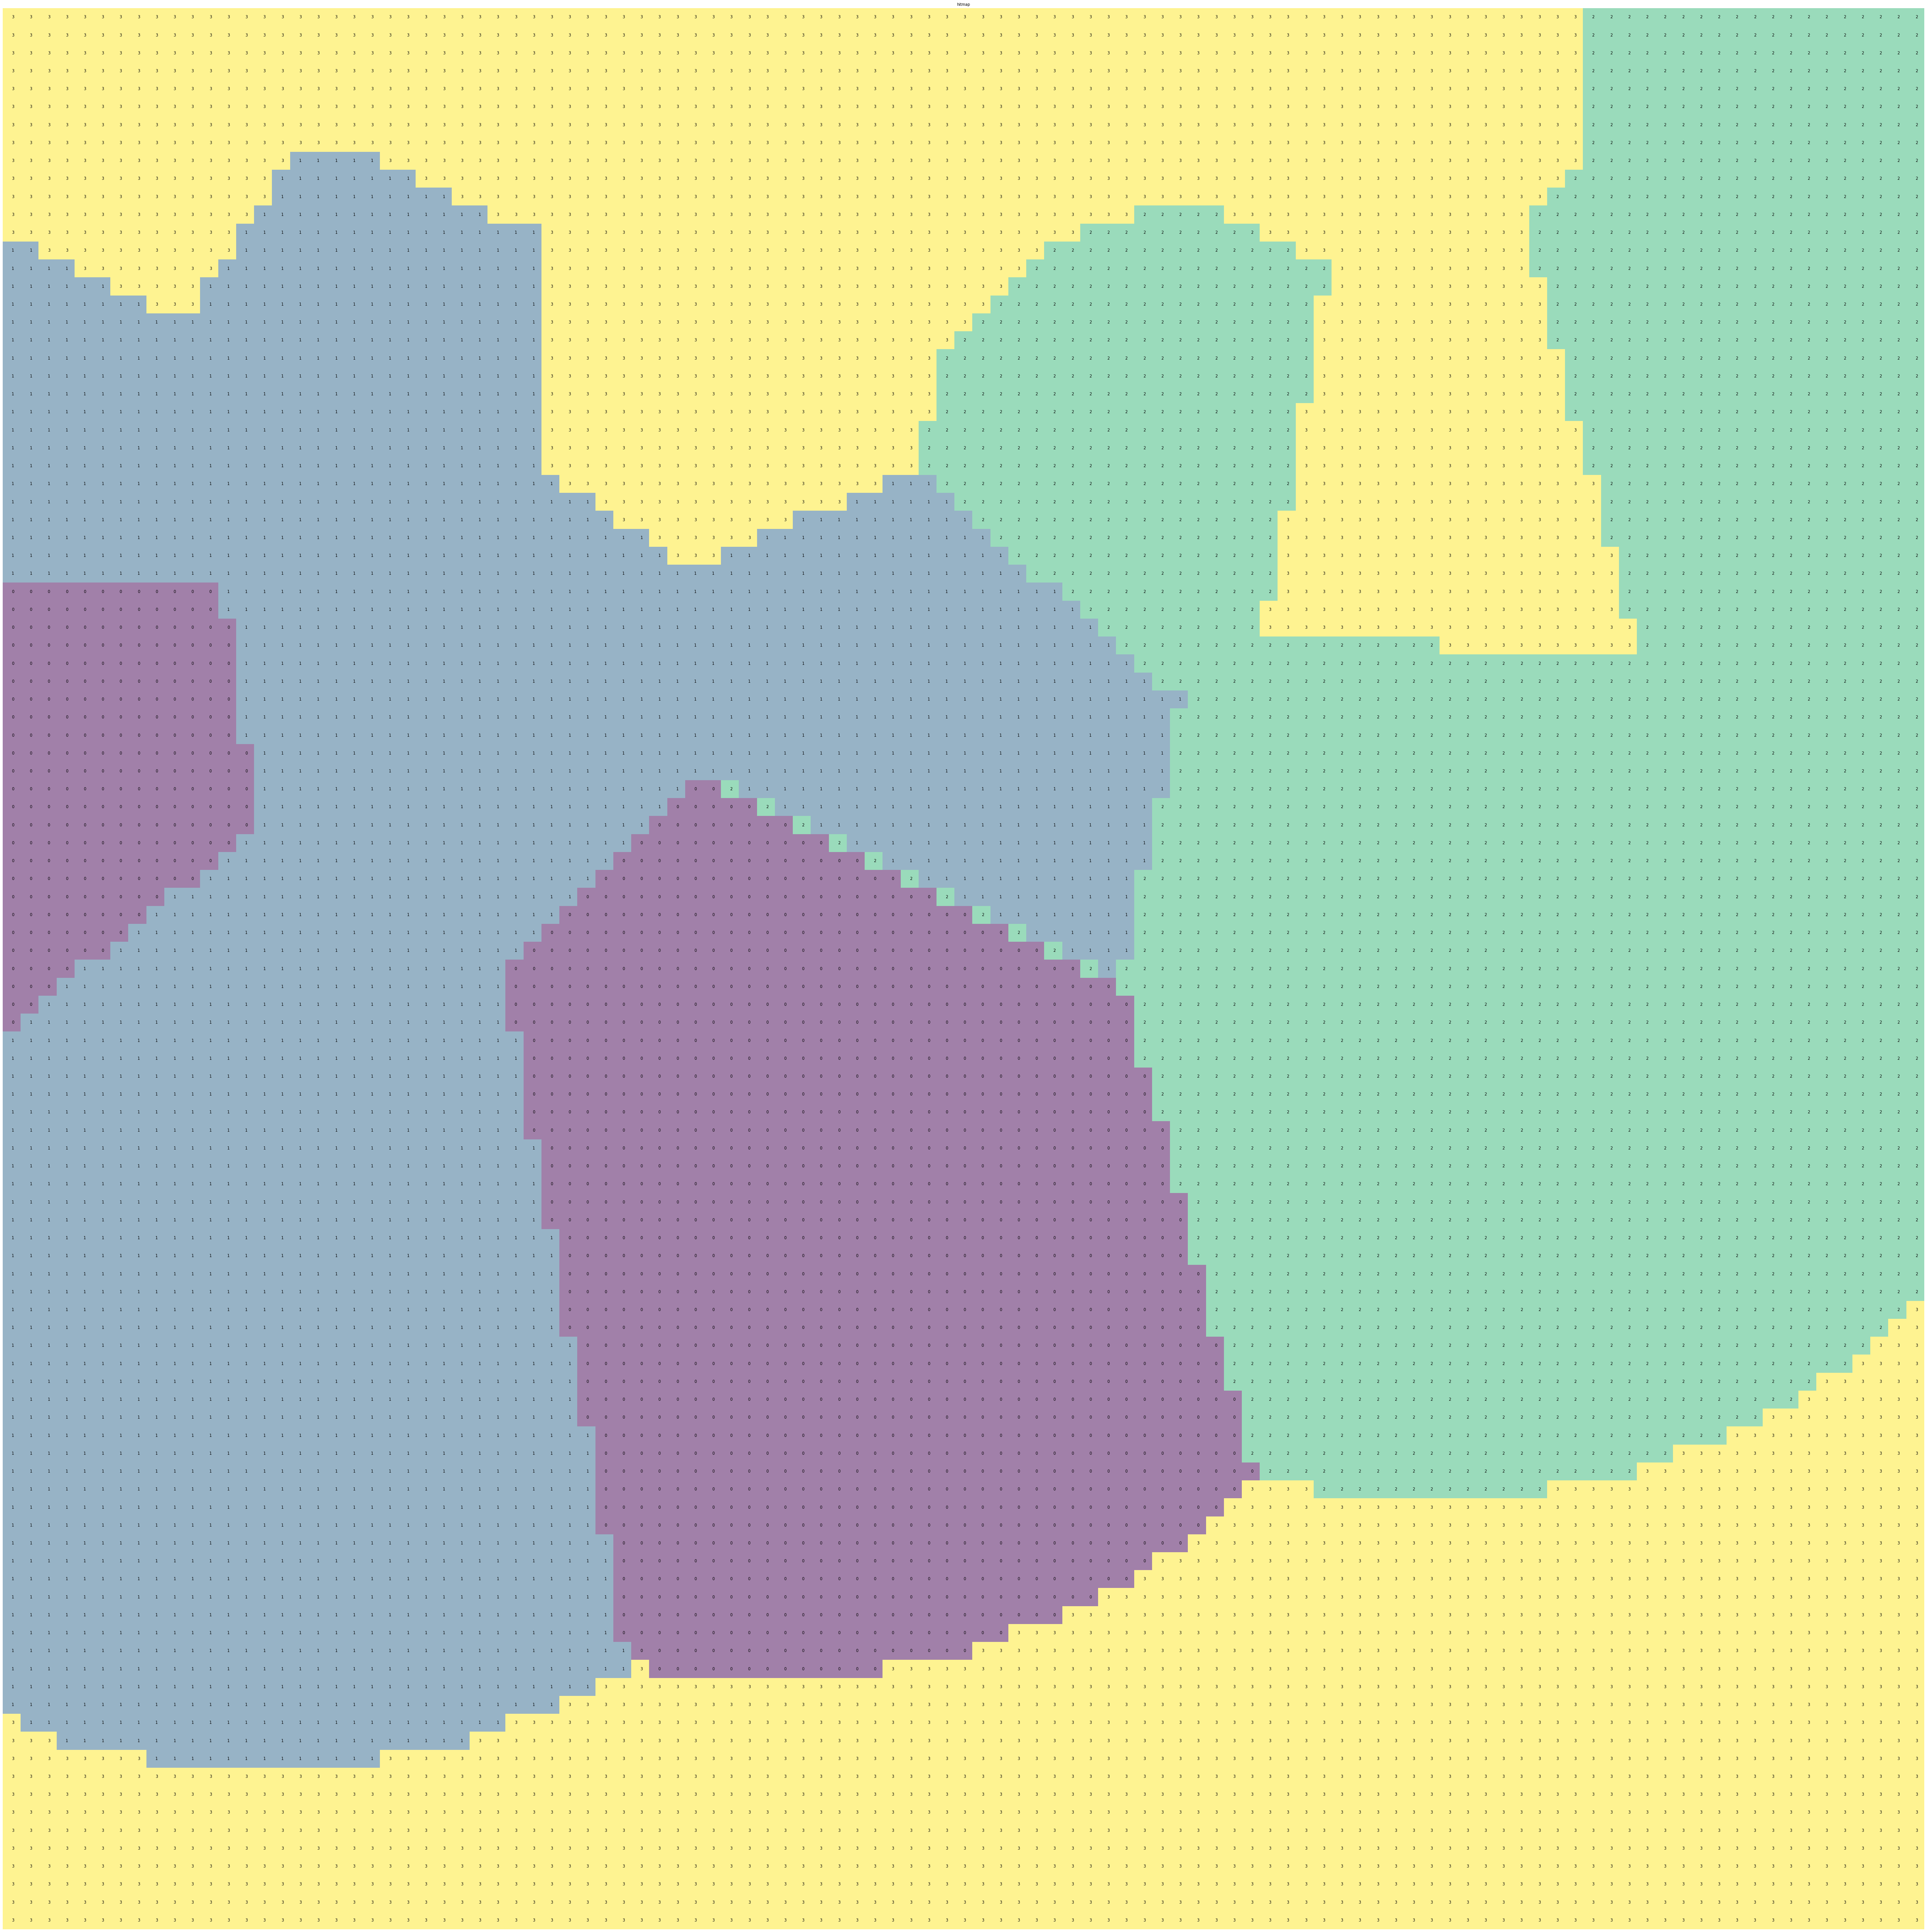

array([[    0,     0,     0],
       [    0,     1,     1],
       [    0,     2,     2],
       ...,
       [  106,   104, 11446],
       [  106,   105, 11447],
       [  106,   106, 11448]])

In [58]:
h = sompy.hitmap.HitMapView(91, 91, 'hitmap', text_size=100, show_text=True)
h.show(som)


